In [ ]:
# 순환 신경망으로 IMDB 분류하기

# 긍정, 부정 리뷰를 분류해보자.

# 영어단어를 통째로 모델에 넣진 않는다. 고유한 단어 단위로 정수를 부여해서
# 그 정수를 넣는다. 이 때, 대문자는 다 소문자로 바꾸고 그 단위는 토큰이라고 부른다.

# 예약된 것들도 있다.
# 0 - 패딩 ()
# 1 - 문장의 시작
# 2 - 어휘 사전엔 없는 토큰

from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
print(train_input.shape, test_input.shape)
# 크기가 1차원 배열인 이유는 샘플의 문장 길이가 다 다르기 때문에 파이썬 리스트에 담아야
# 메모리를 효율적으로 사용할 수 있기 때문이다.

17473536/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)


In [ ]:
print(len(train_input[0]))
print(train_input[0])
print(train_target[:20])

218
[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
# 훈련세트에서 검증세트를 뽑아보자.

In [ ]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))
# 평균은 239인데 중간값은 178인걸로 보아 이것은 치우친 데이터인것 같다!

239.00925 178.0


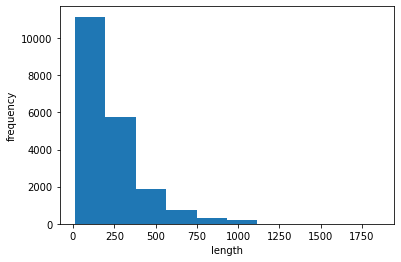

In [ ]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

print(train_seq.shape)
print(train_seq[0])

print(train_input[0][-10:])

# 자 그렇다면, pad_sequences는 문장의 앞 부분을 잘라내는 건지 
# 뒷 부분을 잘라내는건지 알 수 있다.
# 음수 인덱싱을 통해 비교해보면 앞이 날아갔다.

# 뒷부분을 자르고 싶으면 pad_sequences() 함수의 truncating 매개변수의 값을 pre -> post로 바꾸면 됨.
# 같은 이유로 0 패딩은 앞에 붙는다.

# 검증 세트도 동일하게 맞춘다.
val_seq = pad_sequences(val_input, maxlen=100)

(20000, 100)
[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
# 케라스는 여러 순환층 클래스를 제공하는데, 그 중 SimpleRNN이 가장 간단하다.
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500))) # 500은 어디서 왔을까?
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 갑자기 SimpleRNN에 500은 어디서 왔는가?
# 처음 입력에서 단어 입력을 정수로 했는데,
# 이것의 문제는 사실 10, 20의 정수 입력은 값이 큰데에 전혀 의미가 없는데
# 그 의미가 반영된다는 것이다.
# 따라서 원-핫 코딩을 해야한다. [0,0,0,0,0,1,0,0] 이런 식으로.

train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape) # 변환 완료
val_oh = keras.utils.to_categorical(val_seq)
model.summary()

(20000, 100, 500)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 40s 112ms/step - loss: 0.7000 - accuracy: 0.4954 - val_loss: 0.6991 - val_accuracy: 0.4914
Epoch 2/100
313/313 [==============================] - 33s 106ms/step - loss: 0.6970 - accuracy: 0.5033 - val_loss: 0.6969 - val_accuracy: 0.4974
Epoch 3/100
313/313 [==============================] - 35s 113ms/step - loss: 0.6946 - accuracy: 0.5107 - val_loss: 0.6952 - val_accuracy: 0.5052
Epoch 4/100
313/313 [==============================] - 33s 106ms/step - loss: 0.6926 - accuracy: 0.5188 - val_loss: 0.6937 - val_accuracy: 0.5090
Epoch 5/100
313/313 [==============================] - 34s 109ms/step - loss: 0.6908 - accuracy: 0.5281 - val_loss: 0.6925 - val_accuracy: 0.5126
Epoch 6/100
313/313 [==============================] - 34s 109ms/step - loss: 0.6891 - accuracy: 0.5379 - val_loss: 0.6913 - val_accuracy: 0.5192
Epoch 7/100
166/313 [==============>...............] - ETA: 15s - loss: 0.6872 - accuracy: 0.5440

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
# 근데 생각을 해보자. 원-핫 코딩을 계속 사용하면 용량이 미친듯이 커진다.
# 그래서 쓰는게 단어 임베딩이다.

# 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 줍니다.

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
model2.summary()

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()